# Logistic regression

**Logistic regression and regularization**

regularization combats overfitting by making the model coefficients smaller.

in sklearn,`C`is the inverse of the regularization strength. meaning larger `C` means less regularization and smaller `C` means more regularization

Regularization make a training accuracy go down, because it penalizes large coefficients. 

regularized loss = original loss + large coefficient penalty.
* without regularization, we are maximizing the training accuracy.
* but regularization improves the test accuracy, regularization courses you to overfit less.

**L1 vs L2 regularization**

Lasso=linear regression with L1 regularization
Ridge=linear regression with L2 regularization

both helps to reduce over fiting and L1 performs feature selection as well.

In [1]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X=data.data
y=data.target
print(f'X shape is {X.shape} \ny shape is {y.shape}')

X shape is (569, 30) 
y shape is (569,)


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [3]:
import matplotlib.pyplot as plt

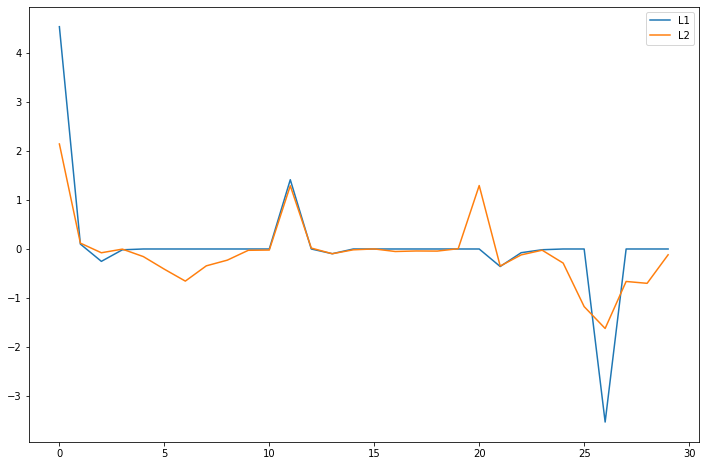

In [6]:
lr_L1 = LogisticRegression(solver='liblinear',penalty='l1')
lr_L2 = LogisticRegression(solver='liblinear') # penalty='l2' by default
lr_L1.fit(X, y)
lr_L2.fit(X, y)

plt.figure(figsize=(12,8))
plt.plot(lr_L1.coef_.flatten(),label='L1')
plt.plot(lr_L2.coef_.flatten(),label='L2')
plt.legend()
plt.show()

As you can see, L1 regularization set many of the coefficients to zero, thus ignoring those features; in other words, it performed feature selection for us. On the other hand, L2 regularization just shrinks the coefficients to be smaller. This is analogous to what happens with Lasso and Ridge regression.

In [7]:
from sklearn.datasets import load_digits

data=load_digits()
X=data.data
y=data.target
X.shape

(1797, 64)

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.25)

print("X_train ",X_train.shape)
print("X_valid ",X_valid.shape)

X_train  (1347, 64)
X_valid  (450, 64)


## Regularized logistic regression

In Chapter 1, you used logistic regression on the handwritten digits data set. Here, we'll explore the effect of L2 regularization.

The handwritten digits dataset is already loaded, split, and stored in the variables X_train, y_train, X_valid, and y_valid. The variables train_errs and valid_errs are already initialized as empty lists.

**Instructions**

* Loop over the different values of C_value, creating and fitting a LogisticRegression model each time.
* Save the error on the training set and the validation set for each model.
* Create a plot of the training and testing error as a function of the regularization parameter, C.
* Looking at the plot, what's the best value of C?

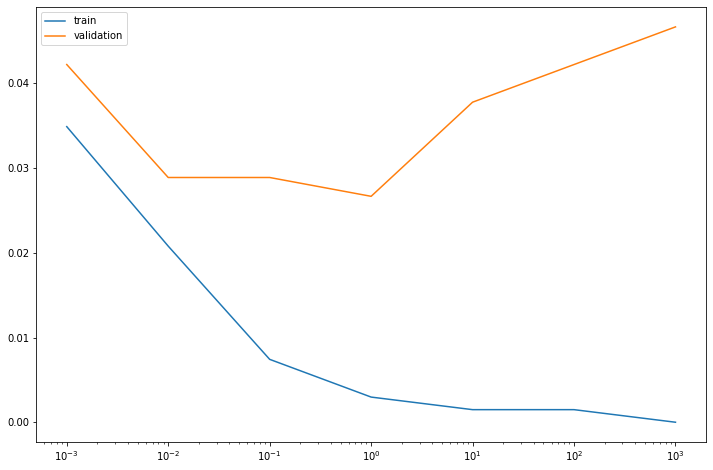

In [16]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()
C_values=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Loop over values of C_value
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(solver='liblinear',C=C_value)
    lr.fit(X_train,y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train,y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid,y_valid) )
    
# Plot results
plt.figure(figsize=(12,8))
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

As you can see, too much regularization (small C) doesn't work well - due to underfitting - and too little regularization (large C) doesn't work well either - due to overfitting

## Logistic regression and feature selection
In this exercise we'll perform feature selection on the movie review sentiment data set using L1 regularization. The features and targets are already loaded for you in X_train and y_train.

We'll search for the best value of C using scikit-learn's GridSearchCV(), which was covered in the prerequisite course.

**Instructions**

* Instantiate a logistic regression object that uses L1 regularization.
* Find the value of C that minimizes cross-validation error.
* Print out the number of selected features for this value of C.

load digits data was used instead

In [34]:
movie_rev=pd.read_table("labeledTrainData.tsv")
#movie_rev_train=movie_rev.iloc[0:2000,:]
X_train,y_train=movie_rev['review'][0:2000],movie_rev['sentiment'][0:2000]
X_test,y_test=movie_rev['review'][2000:4000],movie_rev['sentiment'][2000:4000]

## Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(lowercase=True,token_pattern = '(?u)\\b\\w\\w+\\b',stop_words='english')

# Fit the training data and then return the sparse matrix
training_data = count_vector.fit_transform(X_train)
X_train=training_data
# Transform testing data and return the sparse matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)
X_test=testing_data


In [35]:
from sklearn.model_selection import GridSearchCV

# Specify L1 regularization
lr = LogisticRegression(penalty='l1',solver='liblinear')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 1}
Total number of features: 25549
Number of selected features: 671


As you can see, a whole lot of features were discarded here.

In [36]:
print(best_lr)

LogisticRegression(C=1, penalty='l1', solver='liblinear')


## Identifying the most positive and negative words

In this exercise we'll try to interpret the coefficients of a logistic regression fit on the movie review sentiment dataset. The model object is already instantiated and fit for you in the variable lr.

In addition, the words corresponding to the different features are loaded into the variable vocab. For example, since vocab[100] is "think", that means feature 100 corresponds to the number of times the word "think" appeared in that movie review.

In [ ]:
toy_2D=pd.read_csv('toy_2D.csv')
toy_2D.head()

lr_mn=LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

lr_ovr=LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)